## Functions to detect and select faces

In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Face detecting & showing function

In [2]:
# get a list of faces in the image
def face_detecting(image):
    detector = dlib.get_frontal_face_detector()
    faces = detector(image, 1)
    return faces

In [3]:
# show all the faces in rectangles in the image
def face_showing(image, faces):
    for face in faces:
        cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (255, 255, 255), 2)
    return image

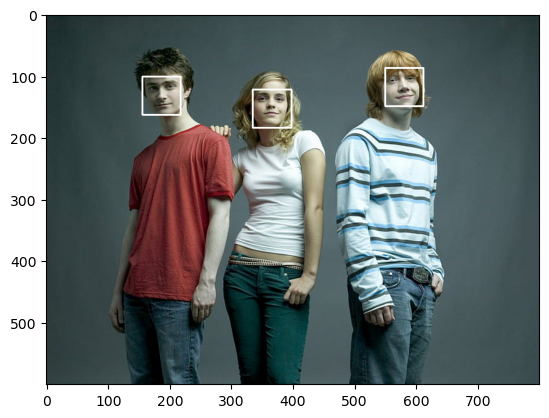

In [4]:
# testing
faces = face_detecting(cv2.imread('../faces library/multi.png'))
faces_rectangle = face_showing(cv2.imread('../faces library/multi.png'), faces)

plt.imshow(cv2.cvtColor(faces_rectangle, cv2.COLOR_BGR2RGB))


### Face Selecting Function

In [5]:
# highlight the selected face in the image, using index to select the face
def face_selecting(image, faces, index):
    face = faces[index]
    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (255, 255, 255), 2)
    return image

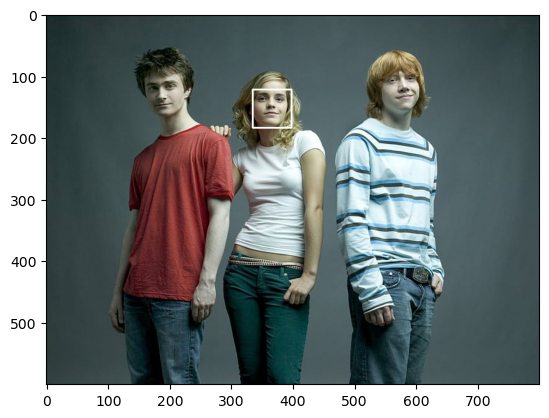

In [6]:
# testing
face_selected = face_selecting(cv2.imread('../faces library/multi.png'), faces, 0)

plt.imshow(cv2.cvtColor(face_selected, cv2.COLOR_BGR2RGB))

In [7]:
# get the landmarks of the face
def face_landmarking(image, face):
    predictor = dlib.shape_predictor('../shape_predictor_68_face_landmarks.dat')
    landmarks = predictor(image, face)
    return landmarks

In [8]:
# get the eyes landmarks of the face
def face_eyes_landmarking(image, face):
    landmarks = face_landmarking(image, face)
    
    left_eye_landmarks = []
    right_eye_landmarks = []
    
    for i in range(36, 42):
        left_eye_landmarks.append((landmarks.part(i).x, landmarks.part(i).y))
    
    for i in range(42, 48):
        right_eye_landmarks.append((landmarks.part(i).x, landmarks.part(i).y))
    
    return left_eye_landmarks, right_eye_landmarks

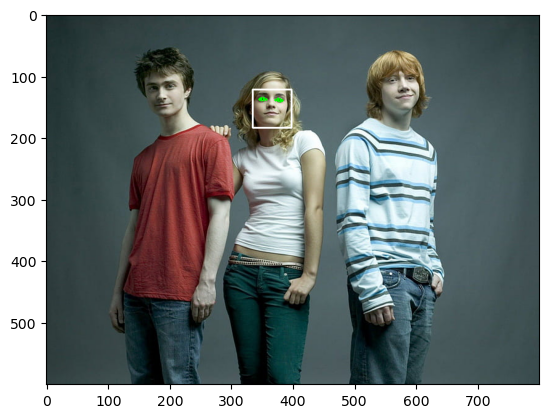

In [9]:
# testing
left_eye_landmarks, right_eye_landmarks = face_eyes_landmarking(cv2.imread('../faces library/multi.png'), faces[0])
face = face_selecting(cv2.imread('../faces library/multi.png'), faces, 0)
for landmark in left_eye_landmarks:
    cv2.circle(face, landmark, 2, (0, 255, 0), -1)
for landmark in right_eye_landmarks:
    cv2.circle(face, landmark, 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))


In [10]:
# get the nose landmarks of the face
def face_nose_landmarking(image, face):
    landmarks = face_landmarking(image, face)
    
    nose_landmarks = []
    
    for i in range(27, 36):
        nose_landmarks.append((landmarks.part(i).x, landmarks.part(i).y))
    
    return nose_landmarks

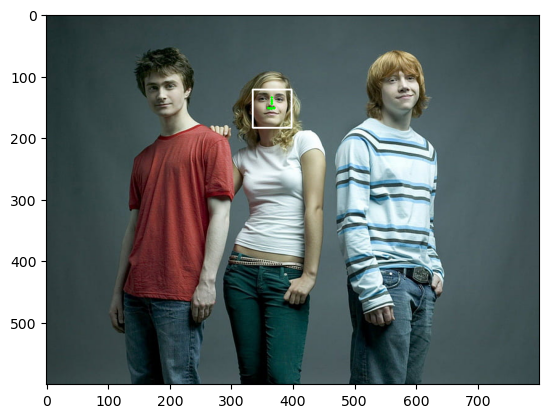

In [11]:
# testing
nose_landmarks = face_nose_landmarking(cv2.imread('../faces library/multi.png'), faces[0])
face = face_selecting(cv2.imread('../faces library/multi.png'), faces, 0)
for landmark in nose_landmarks:
    cv2.circle(face, landmark, 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))


In [12]:
# get the mouth landmarks of the face
def face_mouth_landmarking(image, face):
    landmarks = face_landmarking(image, face)
    
    mouth_landmarks = []
    
    for i in range(48, 68):
        mouth_landmarks.append((landmarks.part(i).x, landmarks.part(i).y))
    
    return mouth_landmarks

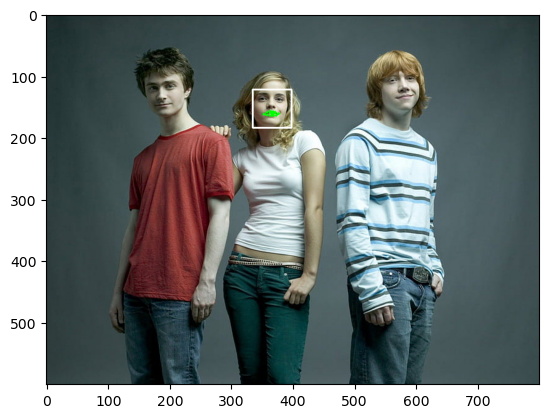

In [13]:
# testing
mouth_landmarks = face_mouth_landmarking(cv2.imread('../faces library/multi.png'), faces[0])
face = face_selecting(cv2.imread('../faces library/multi.png'), faces, 0)
for landmark in mouth_landmarks:
    cv2.circle(face, landmark, 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))